In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403897 entries, 0 to 1403896
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1403897 non-null  int64  
 1   kWh       1403897 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.4 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1403892    0.16
1403893    0.16
1403894    0.16
1403895    0.16
1403896    0.16
Name: kWh, Length: 1403897, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1403892    0.16
1403893    0.16
1403894    0.16
1403895    0.16
1403896    0.16
Name: kWh, Length: 1403897, dtype: float64

In [7]:
l=len(conso_data)-1
l

1403896

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403897 entries, 0 to 1403896
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1403897 non-null  int64  
 1   kWh        1403897 non-null  float64
 2   sec        1403897 non-null  float64
 3   Wh         1403897 non-null  float64
 4   cumul(ms)  1403897 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 53.6 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1403892,21836,0.16,21.836,164.865360,33018078341
1403893,21861,0.16,21.861,164.676822,33018100202
1403894,21891,0.16,21.891,164.451144,33018122093
1403895,22137,0.16,22.137,162.623662,33018144230
1403896,21821,0.16,21.821,164.978690,33018166051


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

33018166051000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 23, 44, 928973)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [18]:
conso_data['dates']

0         2023-08-21 19:24:06.862973
1         2023-08-21 19:24:28.720973
2         2023-08-21 19:24:50.721973
3         2023-08-21 19:25:12.649973
4         2023-08-21 19:25:34.540973
                     ...            
1403892   2024-09-06 23:05:03.269973
1403893   2024-09-06 23:05:25.130973
1403894   2024-09-06 23:05:47.021973
1403895   2024-09-06 23:06:09.158973
1403896   2024-09-06 23:06:30.979973
Name: dates, Length: 1403897, dtype: datetime64[ns]

In [19]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

In [335]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('05/09/24', 5, 9, 2024)

In [336]:
here = now.strftime('%H:%M:%S')
here

'22:00:02'

In [337]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [338]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3459 entries, 1396752 to 1400210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3459 non-null   int64         
 1   kWh        3459 non-null   float64       
 2   sec        3459 non-null   float64       
 3   Wh         3459 non-null   float64       
 4   cumul(ms)  3459 non-null   int64         
 5   dates      3459 non-null   datetime64[ns]
 6   days       3459 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 216.2+ KB


In [339]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [340]:
data = list(df_grp['kWh'])
print(data)


[0.799, 3.7, 4.218, 3.687, 4.178, 4.582, 3.547, 3.431, 3.512, 3.691, 3.73, 3.829, 4.258, 3.772, 3.504, 3.631, 3.324, 3.383, 4.267, 4.004, 4.045, 3.94, 3.452, 4.432, 3.76, 3.767, 4.291, 4.72, 3.842, 3.224, 3.169, 3.986, 3.695, 3.148, 3.767, 4.155, 3.77, 3.586, 4.752, 4.21, 4.526, 3.78, 3.418, 4.307, 3.877, 3.845, 3.452, 4.071, 3.662, 3.403, 4.145, 3.38, 3.871, 3.843, 3.637, 3.759, 4.251, 3.294, 3.88, 2.997, 2.055, 2.041, 2.437, 4.08, 3.72, 4.326, 3.614, 3.934, 3.743, 3.886, 4.017, 4.104, 3.663, 3.151, 3.805, 3.508, 3.626, 3.667, 3.719, 3.252, 3.858, 3.251, 3.796, 3.613, 4.076, 3.564, 3.39, 3.811, 4.06, 4.335, 4.135, 3.999, 4.24, 3.742, 3.927, 3.856, 3.917, 3.73, 4.057, 4.346, 3.886, 3.504, 3.683, 3.667, 3.347, 3.843, 3.998, 4.107, 3.48, 4.173, 3.595, 4.048, 4.564, 3.669, 3.45, 3.577, 4.138, 3.707, 4.101, 3.98, 3.746, 3.591, 5.123, 3.706, 3.765, 4.279, 4.115, 4.673, 4.415, 4.011, 3.743, 4.313, 4.708, 4.224, 4.795, 4.313, 3.687, 4.216, 3.698, 3.675, 3.531, 3.921, 3.692, 3.782, 3.584, 3.48

In [341]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [342]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [343]:
df = conso_data
len(df)

1400211

In [344]:
period(p=2)

2023-08-22 01:30:21.231826	2023-08-22 08:34:36.851826	7h 4m 15s 	2000


In [345]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.30244
dtype: float64

In [346]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.665474
dtype: float64

In [347]:
last=df_grp.iloc[-1]['kWh']
last

3.459

In [348]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3459 entries, 1396752 to 1400210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3459 non-null   int64         
 1   kWh        3459 non-null   float64       
 2   sec        3459 non-null   float64       
 3   Wh         3459 non-null   float64       
 4   cumul(ms)  3459 non-null   int64         
 5   dates      3459 non-null   datetime64[ns]
 6   days       3459 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 216.2+ KB


In [349]:
# select day
day = today
#day = '16/08/24'


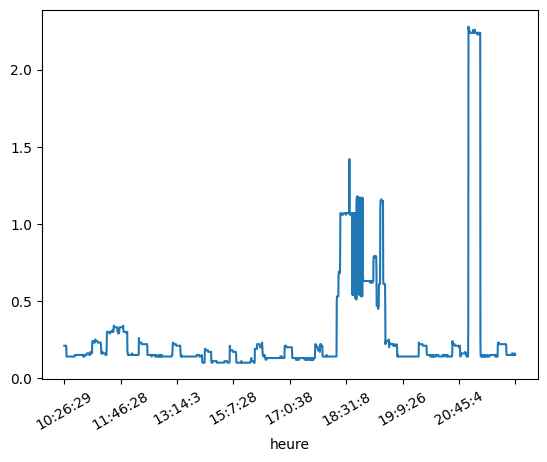

In [350]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [351]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:24:07.428826,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:24:29.286826,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:24:51.287826,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:25:13.215826,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:25:35.106826,21/08/23
...,...,...,...,...,...,...,...
1400206,23724,0.15,23.724,151.745068,32927647211,2024-09-05 21:57:52.705826,05/09/24
1400207,23619,0.15,23.619,152.419662,32927670830,2024-09-05 21:58:16.324826,05/09/24
1400208,22949,0.16,22.949,156.869580,32927693779,2024-09-05 21:58:39.273826,05/09/24
1400209,23473,0.15,23.473,153.367699,32927717252,2024-09-05 21:59:02.746826,05/09/24


In [352]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:4,16812,0.21,16.812,214.132762,32848578939,2024-09-05 00:00:04.433826,05/09/24
0:0:21,16915,0.21,16.915,212.828850,32848595854,2024-09-05 00:00:21.348826,05/09/24
0:0:38,16917,0.21,16.917,212.803689,32848612771,2024-09-05 00:00:38.265826,05/09/24
0:0:55,16908,0.21,16.908,212.916962,32848629679,2024-09-05 00:00:55.173826,05/09/24
0:1:11,15961,0.22,15.961,225.549778,32848645640,2024-09-05 00:01:11.134826,05/09/24
...,...,...,...,...,...,...,...
21:57:52,23724,0.15,23.724,151.745068,32927647211,2024-09-05 21:57:52.705826,05/09/24
21:58:16,23619,0.15,23.619,152.419662,32927670830,2024-09-05 21:58:16.324826,05/09/24
21:58:39,22949,0.16,22.949,156.869580,32927693779,2024-09-05 21:58:39.273826,05/09/24


In [353]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 12/08/24 4.382
Min : 20/08/24 3.259


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1396752,16812,0.21,16.812,214.132762,32848578939,2024-09-05 00:00:04.433826,05/09/24,0:0:4
1396753,16915,0.21,16.915,212.828850,32848595854,2024-09-05 00:00:21.348826,05/09/24,0:0:21
1396754,16917,0.21,16.917,212.803689,32848612771,2024-09-05 00:00:38.265826,05/09/24,0:0:38
1396755,16908,0.21,16.908,212.916962,32848629679,2024-09-05 00:00:55.173826,05/09/24,0:0:55
1396756,15961,0.22,15.961,225.549778,32848645640,2024-09-05 00:01:11.134826,05/09/24,0:1:11
...,...,...,...,...,...,...,...,...
1400206,23724,0.15,23.724,151.745068,32927647211,2024-09-05 21:57:52.705826,05/09/24,21:57:52
1400207,23619,0.15,23.619,152.419662,32927670830,2024-09-05 21:58:16.324826,05/09/24,21:58:16
1400208,22949,0.16,22.949,156.869580,32927693779,2024-09-05 21:58:39.273826,05/09/24,21:58:39
1400209,23473,0.15,23.473,153.367699,32927717252,2024-09-05 21:59:02.746826,05/09/24,21:59:2


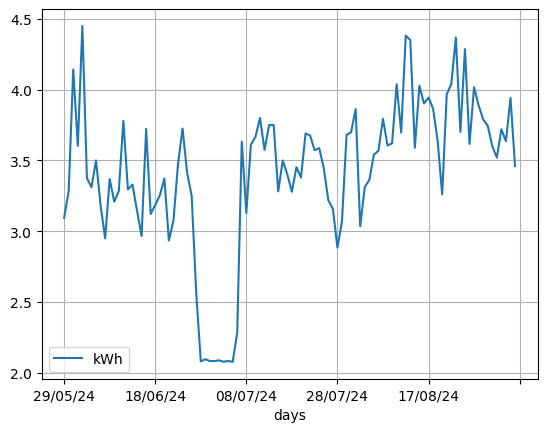

In [354]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-09-05 00:00:04.433826	2024-09-05 07:46:55.214826	7h 46m 50s 	1000
2024-09-05 07:46:55.214826	2024-09-05 13:28:48.905826	5h 41m 53s 	2000
2024-09-05 13:28:48.905826	2024-09-05 19:26:30.831826	5h 57m 41s 	3000
2024-09-05 19:26:30.831826	2024-09-05 21:59:26.534826	2h 32m 55s 	459
<class 'pandas.core.frame.DataFrame'>
Index: 3459 entries, 1396752 to 1400210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3459 non-null   int64         
 1   kWh        3459 non-null   float64       
 2   sec        3459 non-null   float64       
 3   Wh         3459 non-null   float64       
 4   cumul(ms)  3459 non-null   int64         
 5   dates      3459 non-null   datetime64[ns]
 6   days       3459 non-null   object        
 7   heure      3459 non-null   object        
 8   hours      3459 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 270.2+ KB


('05/09/24', <Axes: xlabel='hours'>)

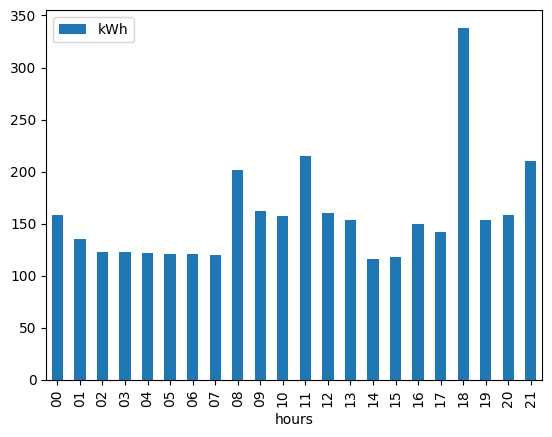

In [355]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [356]:
df_grp

,kWh
days,
21/08/23,0.799
22/08/23,3.700
23/08/23,4.218
24/08/23,3.687
25/08/23,4.178
...,...
01/09/24,3.519
02/09/24,3.720
03/09/24,3.635


In [357]:
# select number of days to display
span = 30
#df_grp.tail(span)


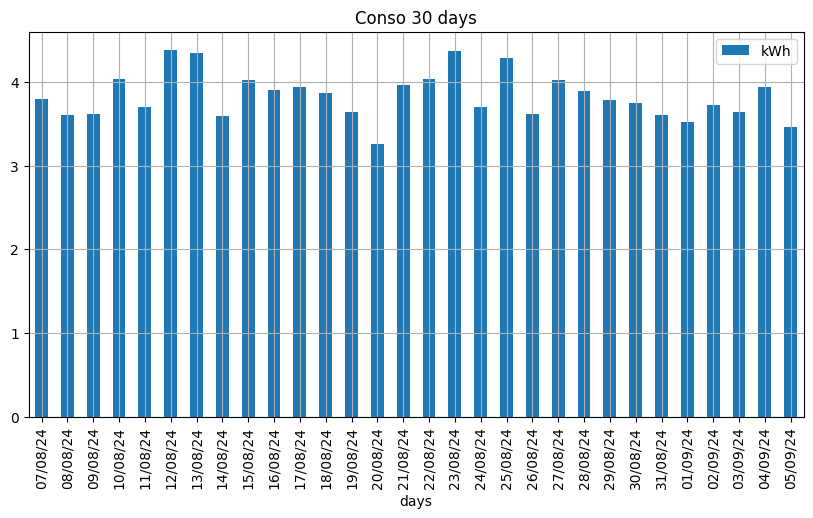

In [358]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


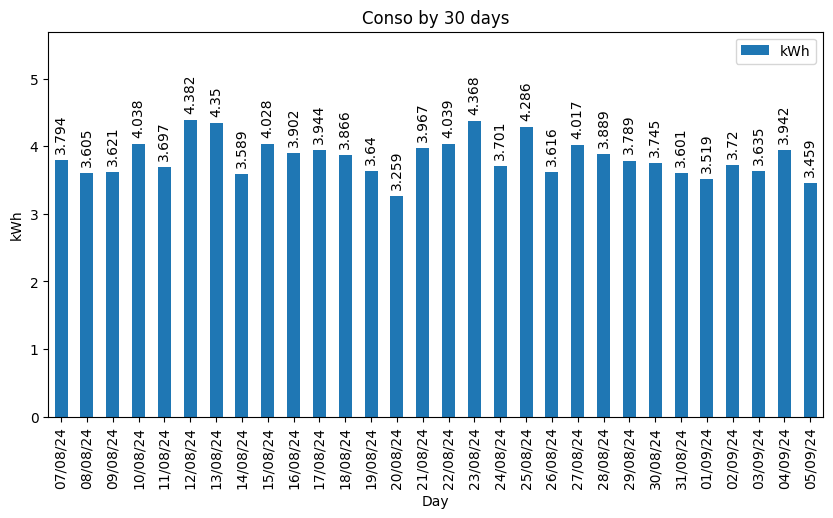

In [359]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [360]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
07/08/24    3.794
08/08/24    3.605
09/08/24    3.621
10/08/24    4.038
11/08/24    3.697
12/08/24    4.382
13/08/24    4.350
14/08/24    3.589
15/08/24    4.028
16/08/24    3.902
17/08/24    3.944
18/08/24    3.866
19/08/24    3.640
20/08/24    3.259
21/08/24    3.967
22/08/24    4.039
23/08/24    4.368
24/08/24    3.701
25/08/24    4.286
26/08/24    3.616
27/08/24    4.017
28/08/24    3.889
29/08/24    3.789
30/08/24    3.745
31/08/24    3.601
01/09/24    3.519
02/09/24    3.720
03/09/24    3.635
04/09/24    3.942
05/09/24    3.459
Name: kWh, dtype: float64

In [361]:
x_labels=df_grp.tail(span).index
x_labels

Index(['07/08/24', '08/08/24', '09/08/24', '10/08/24', '11/08/24', '12/08/24',
       '13/08/24', '14/08/24', '15/08/24', '16/08/24', '17/08/24', '18/08/24',
       '19/08/24', '20/08/24', '21/08/24', '22/08/24', '23/08/24', '24/08/24',
       '25/08/24', '26/08/24', '27/08/24', '28/08/24', '29/08/24', '30/08/24',
       '31/08/24', '01/09/24', '02/09/24', '03/09/24', '04/09/24', '05/09/24'],
      dtype='object', name='days')

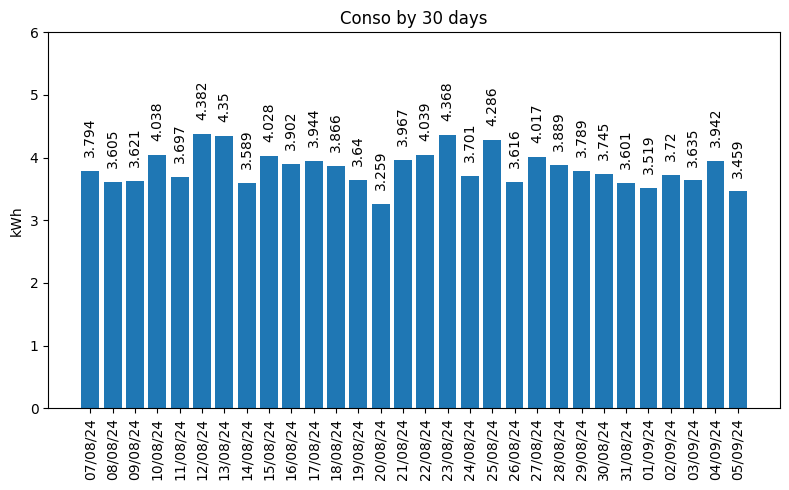

In [362]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [363]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

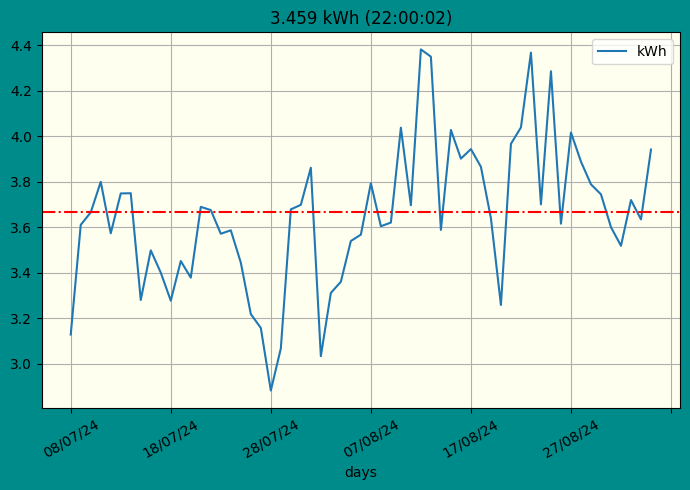

In [364]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

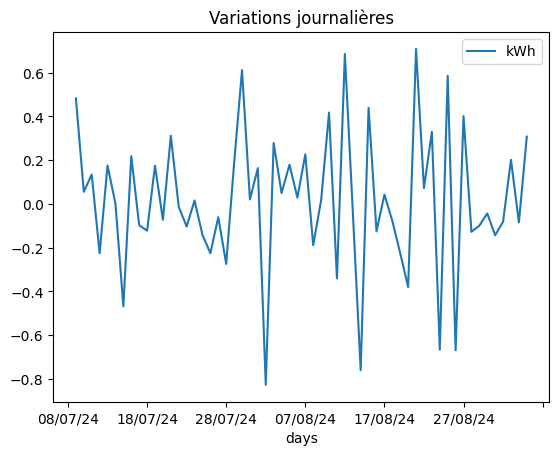

In [365]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [366]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:24:07.428826,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:24:29.286826,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:24:51.287826,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:25:13.215826,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:25:35.106826,21/08/23,19
...,...,...,...,...,...,...,...,...
1400206,23724,0.15,23.724,151.745068,32927647211,2024-09-05 21:57:52.705826,05/09/24,21
1400207,23619,0.15,23.619,152.419662,32927670830,2024-09-05 21:58:16.324826,05/09/24,21
1400208,22949,0.16,22.949,156.869580,32927693779,2024-09-05 21:58:39.273826,05/09/24,21
1400209,23473,0.15,23.473,153.367699,32927717252,2024-09-05 21:59:02.746826,05/09/24,21


In [367]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [368]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [369]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [370]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,799
22/08/23,3700
23/08/23,4218
24/08/23,3687
25/08/23,4178
...,...
01/09/24,3519
02/09/24,3720
03/09/24,3635


In [372]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:24:07.428826,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:24:29.286826,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:24:51.287826,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:25:13.215826,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:25:35.106826,21/08/23,19
...,...,...,...,...,...,...,...,...
1400206,23724,0.15,23.724,151.745068,32927647211,2024-09-05 21:57:52.705826,05/09/24,21
1400207,23619,0.15,23.619,152.419662,32927670830,2024-09-05 21:58:16.324826,05/09/24,21
1400208,22949,0.16,22.949,156.869580,32927693779,2024-09-05 21:58:39.273826,05/09/24,21
1400209,23473,0.15,23.473,153.367699,32927717252,2024-09-05 21:59:02.746826,05/09/24,21


In [373]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
05/09/24 21    1400206  05/09/24    21  0.15
               1400207  05/09/24    21  0.15
               1400208  05/09/24    21  0.16
               1400209  05/09/24    21  0.15
               1400210  05/09/24    21  0.15

[1400211 rows x 3 columns]

In [374]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [375]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [376]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,799,799
22/08/23,3700,3700
23/08/23,4218,4218
24/08/23,3687,3687
25/08/23,4178,4178
...,...,...
01/09/24,3519,3519
02/09/24,3720,3720
03/09/24,3635,3635


In [377]:
grp_by_day['kWh'].cumsum()

days
21/08/23        799
22/08/23       4499
23/08/23       8717
24/08/23      12404
25/08/23      16582
             ...   
01/09/24    1385455
02/09/24    1389175
03/09/24    1392810
04/09/24    1396752
05/09/24    1400211
Name: kWh, Length: 382, dtype: int64

In [378]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     114
         20     280
         21     146
         22     129
         23     130
...             ...
05/09/24 17     142
         18     338
         19     154
         20     158
         21     210

[9147 rows x 1 columns]

In [379]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           114
          20           394
          21           540
          22           669
          23           799
                    ...   
05/09/24  17       1399351
          18       1399689
          19       1399843
          20       1400001
          21       1400211
Name: kWh, Length: 9147, dtype: int64

In [380]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     114     114    NaN
         20     280     394  166.0
         21     146     540 -134.0
         22     129     669  -17.0
         23     130     799    1.0
...             ...     ...    ...
05/09/24 17     142    2599   -8.0
         18     338    2937  196.0
         19     154    3091 -184.0
         20     158    3249    4.0
         21     210    3459   52.0

[9147 rows x 3 columns]

In [381]:
today, grp_by_dayhours.loc[today]

('05/09/24',
        kWh  cumsum   diff
 hours                    
 00     158     158    NaN
 01     135     293  -23.0
 02     123     416  -12.0
 03     123     539    0.0
 04     122     661   -1.0
 05     121     782   -1.0
 06     121     903    0.0
 07     120    1023   -1.0
 08     202    1225   82.0
 09     162    1387  -40.0
 10     157    1544   -5.0
 11     215    1759   58.0
 12     160    1919  -55.0
 13     154    2073   -6.0
 14     116    2189  -38.0
 15     118    2307    2.0
 16     150    2457   32.0
 17     142    2599   -8.0
 18     338    2937  196.0
 19     154    3091 -184.0
 20     158    3249    4.0
 21     210    3459   52.0)

Text(0.5, 1.0, 'Cumul journalier')

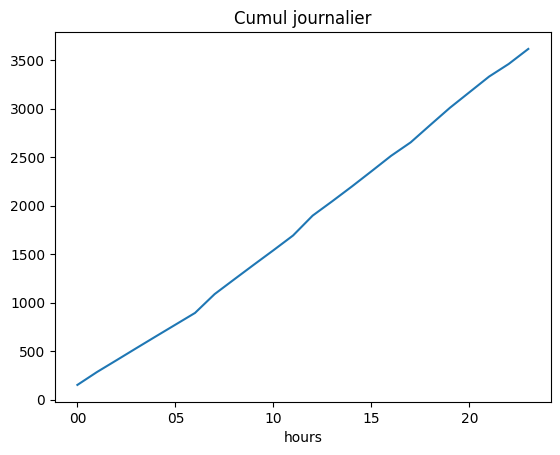

In [382]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

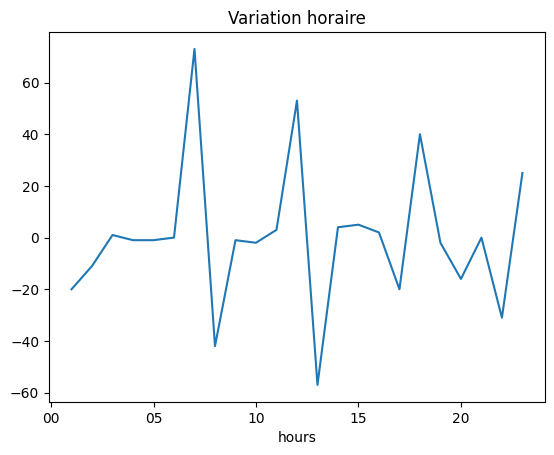

In [383]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [384]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

382

Text(0.5, 1.0, '382 days')

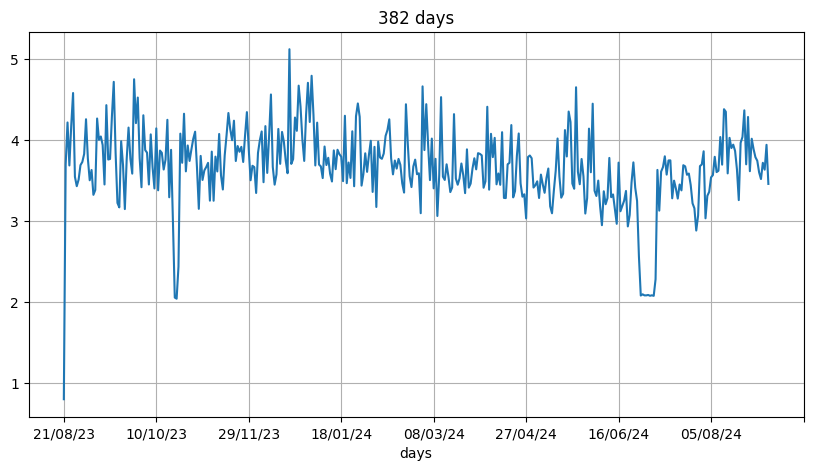

In [385]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [386]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,158,158,NaN
01,135,293,-23.0
02,123,416,-12.0
03,123,539,0.0
04,122,661,-1.0
05,121,782,-1.0
06,121,903,0.0
07,120,1023,-1.0
08,202,1225,82.0


In [387]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


22

In [388]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 23)

In [389]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [390]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [ ]:
grp_by_dayhours.loc[day,'days']

In [391]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [315]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     24 non-null     int64  
 1   cumsum  24 non-null     int64  
 2   diff    23 non-null     float64
 3   days    24 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 960.0+ bytes


In [313]:
grp_by_dayhours.loc[day,'days']

hours
00   NaN
01   NaN
02   NaN
03   NaN
04   NaN
05   NaN
06   NaN
07   NaN
08   NaN
09   NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: days, dtype: float64

In [287]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,158,158,NaN,1.0
01,135,293,-23.0,2.0
02,123,416,-12.0,3.0
03,122,538,-1.0,4.0
04,123,661,1.0,5.0
05,120,781,-3.0,6.0
06,122,903,2.0,7.0
07,120,1023,-2.0,8.0
08,201,1224,81.0,9.0


Text(0.5, 1.0, '05/09/24')

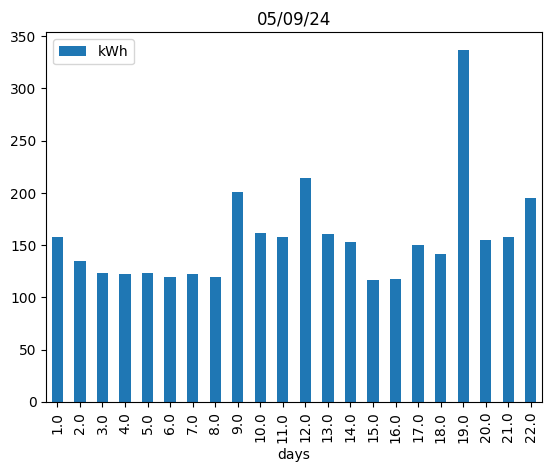

In [288]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [289]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object', name='hours')

# Conso du jour


In [290]:
groupedbyhour.count()

,kWh
hours,
00,158
01,135
02,123
03,122
04,123
05,120
06,122
07,120
08,201


In [291]:
day = '26/08/24'
day = today
grp_by_dayhours.loc[day].kWh

hours
00    158
01    135
02    123
03    122
04    123
05    120
06    122
07    120
08    201
09    162
10    158
11    214
12    161
13    153
14    117
15    118
16    150
17    142
18    337
19    155
20    158
21    195
Name: kWh, dtype: int64

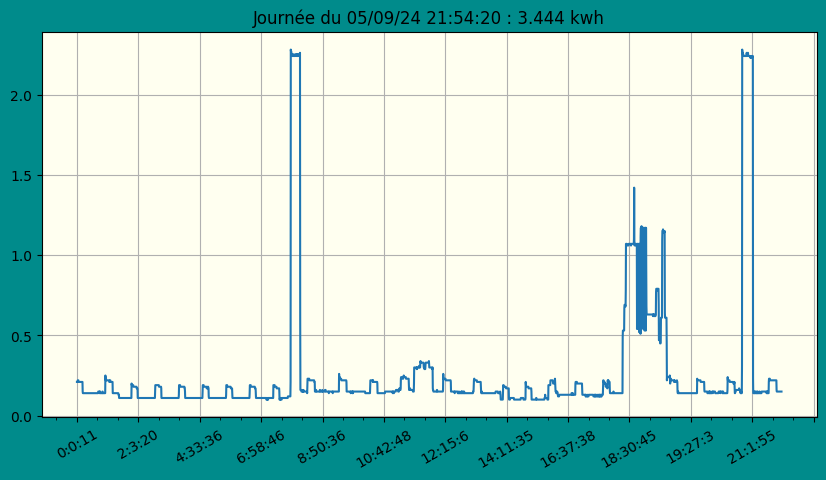

In [292]:

show(day,bgcolor='ivory')


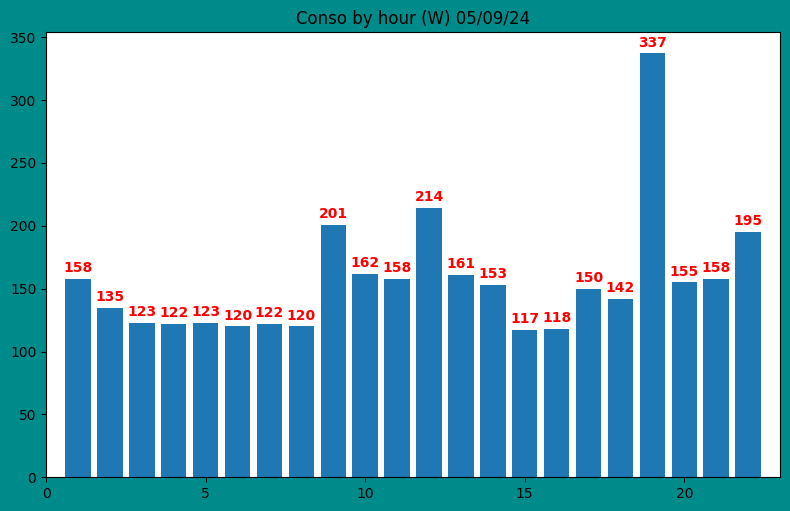

In [293]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [294]:
diff = grp_by_dayhours.loc[day]
diff


,kWh,cumsum,diff,days
hours,,,,
00,158,158,NaN,1.0
01,135,293,-23.0,2.0
02,123,416,-12.0,3.0
03,122,538,-1.0,4.0
04,123,661,1.0,5.0
05,120,781,-3.0,6.0
06,122,903,2.0,7.0
07,120,1023,-2.0,8.0
08,201,1224,81.0,9.0


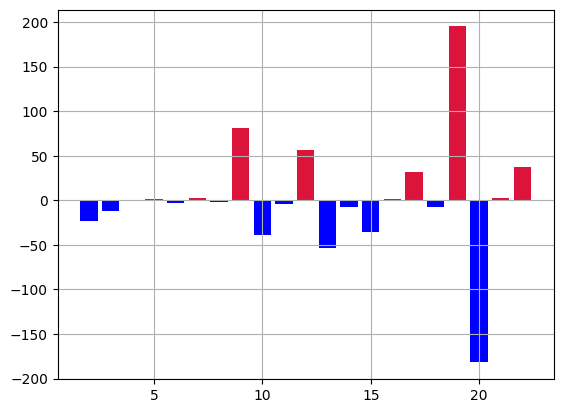

In [295]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

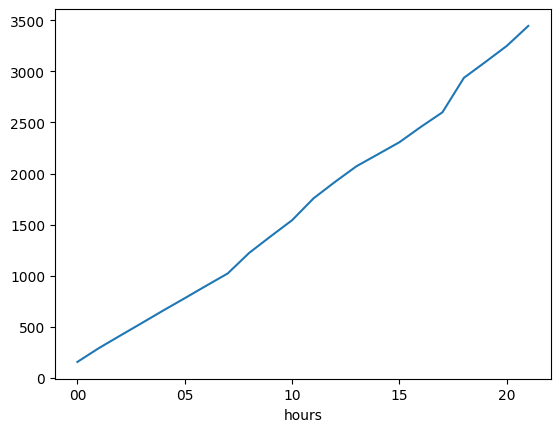

In [296]:
data.cumsum().plot()


<Axes: xlabel='hours'>

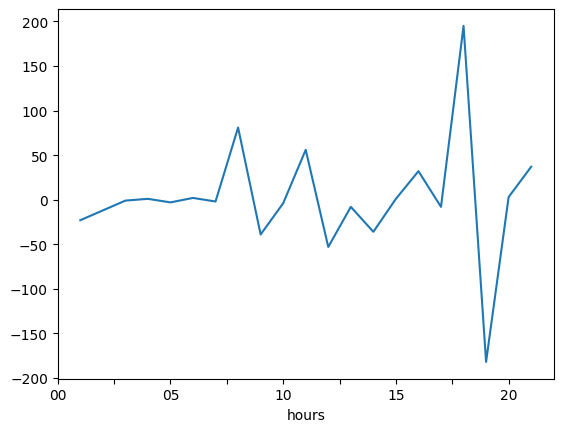

In [297]:
data.diff().plot()

# Test

In [298]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [299]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [300]:
#conso_byhour(day)

In [301]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

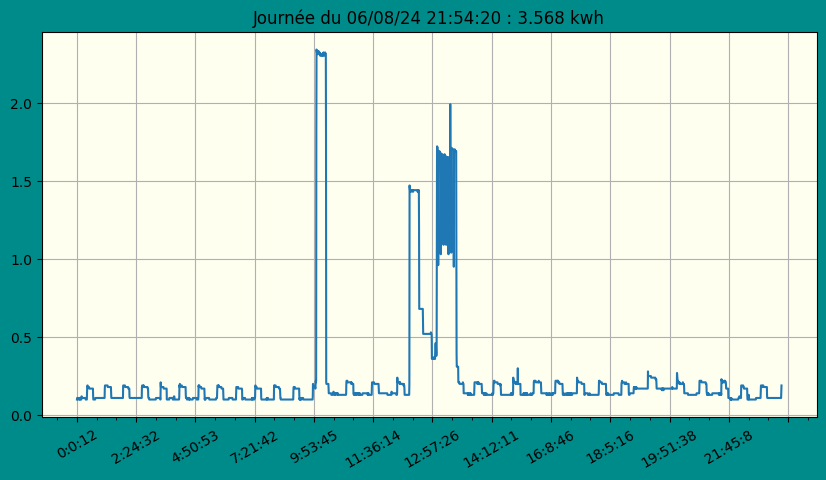

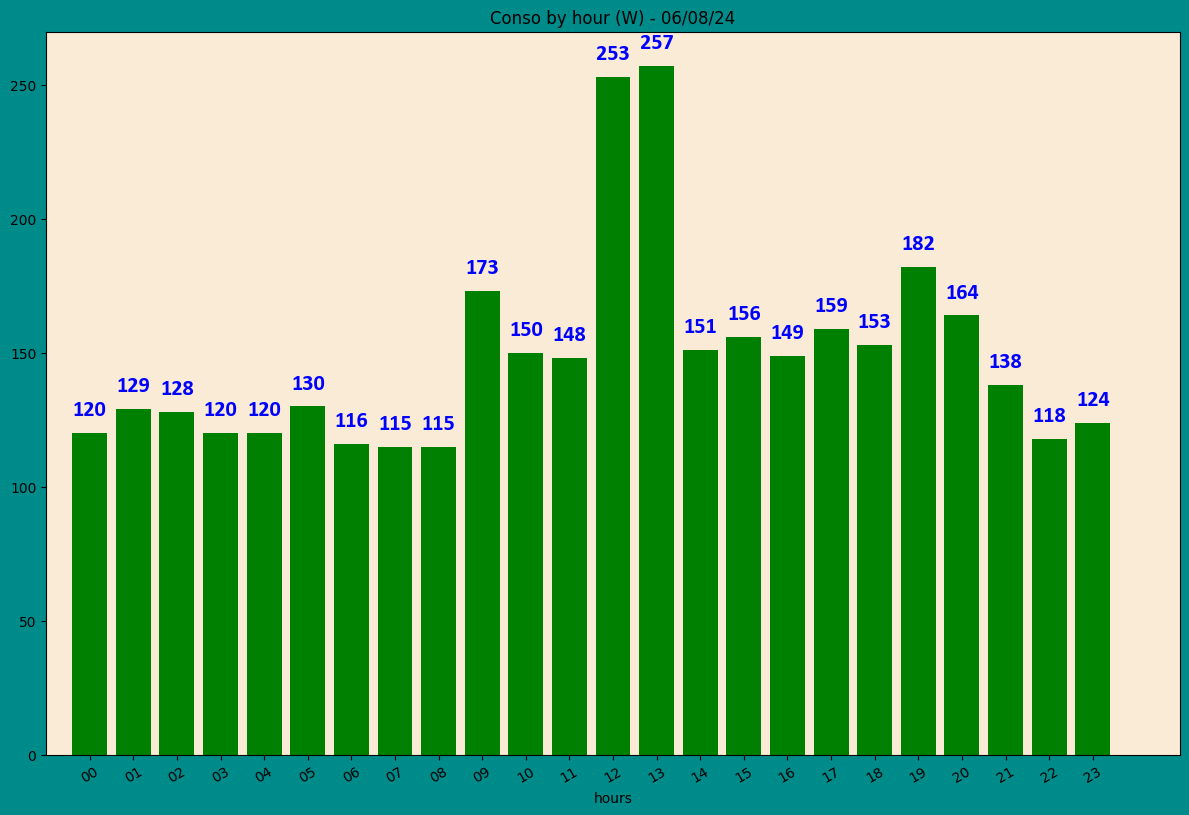

In [302]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

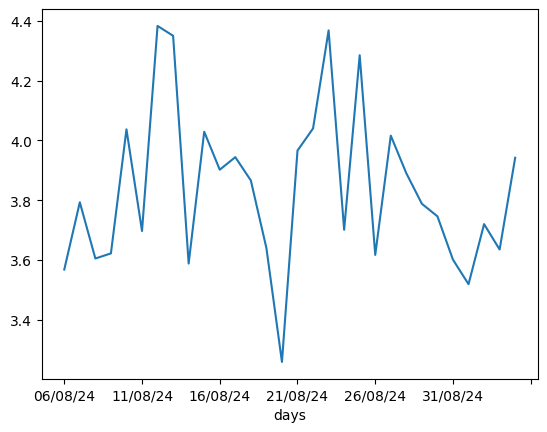

In [303]:
month.plot()


In [304]:
month

days
06/08/24    3.568
07/08/24    3.793
08/08/24    3.605
09/08/24    3.622
10/08/24    4.037
11/08/24    3.697
12/08/24    4.383
13/08/24    4.350
14/08/24    3.588
15/08/24    4.029
16/08/24    3.902
17/08/24    3.944
18/08/24    3.866
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.040
23/08/24    4.368
24/08/24    3.701
25/08/24    4.285
26/08/24    3.617
27/08/24    4.016
28/08/24    3.890
29/08/24    3.788
30/08/24    3.746
31/08/24    3.601
01/09/24    3.519
02/09/24    3.720
03/09/24    3.635
04/09/24    3.942
Name: kWh, dtype: float64

In [305]:
month

days
06/08/24    3.568
07/08/24    3.793
08/08/24    3.605
09/08/24    3.622
10/08/24    4.037
11/08/24    3.697
12/08/24    4.383
13/08/24    4.350
14/08/24    3.588
15/08/24    4.029
16/08/24    3.902
17/08/24    3.944
18/08/24    3.866
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.040
23/08/24    4.368
24/08/24    3.701
25/08/24    4.285
26/08/24    3.617
27/08/24    4.016
28/08/24    3.890
29/08/24    3.788
30/08/24    3.746
31/08/24    3.601
01/09/24    3.519
02/09/24    3.720
03/09/24    3.635
04/09/24    3.942
Name: kWh, dtype: float64

In [306]:
# date with max conso in 1 month
month.idxmax()

'12/08/24'

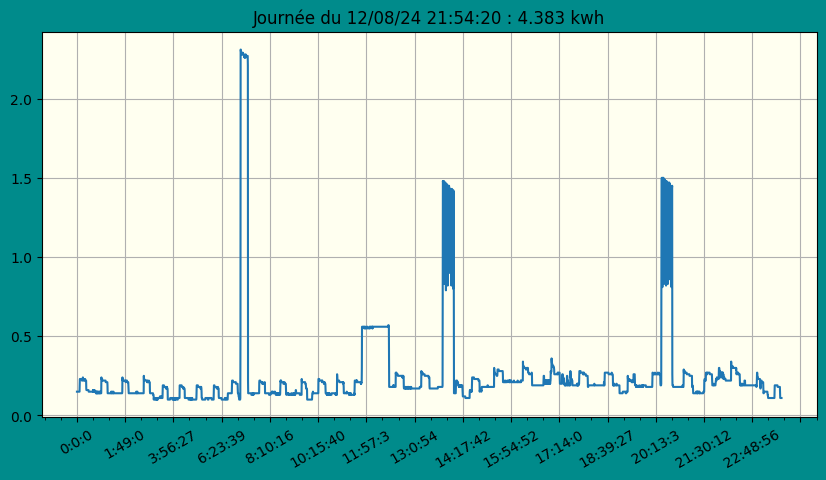

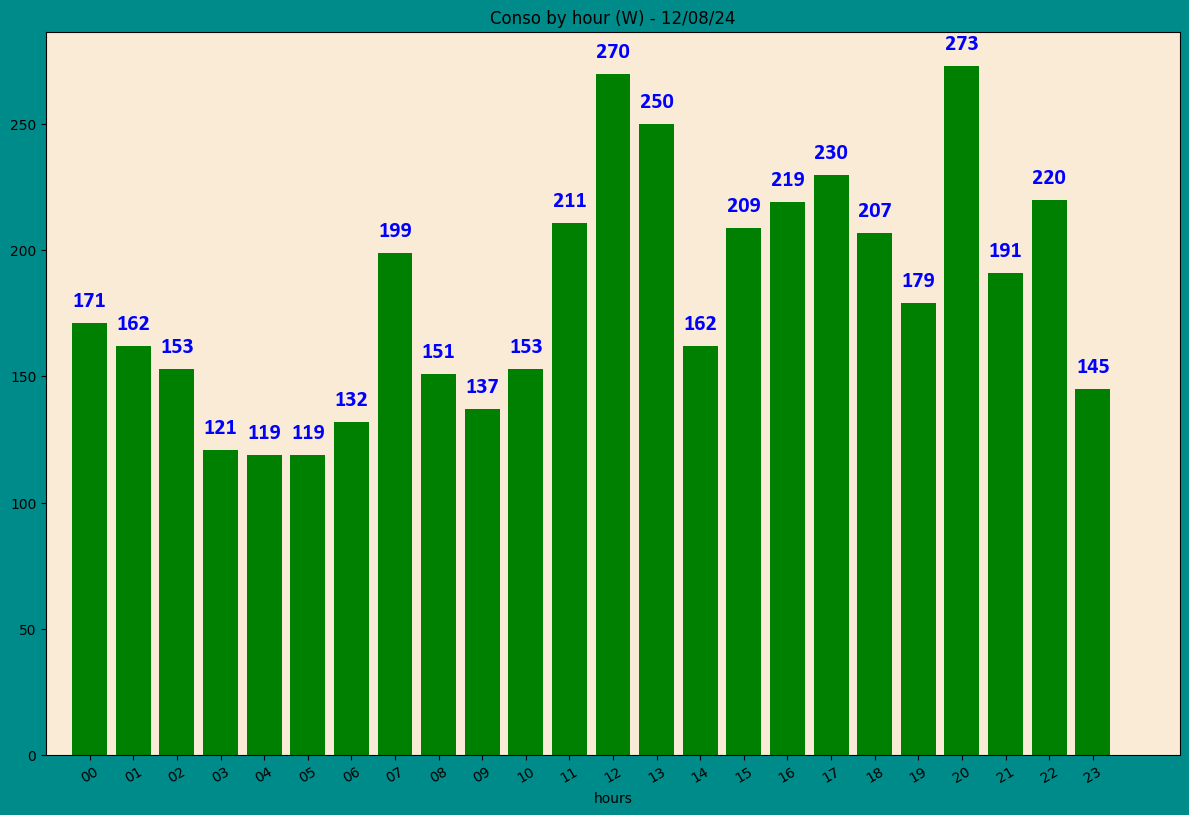

In [307]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [308]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,171,171,NaN,NaN
01,162,333,-9.0,NaN
02,153,486,-9.0,NaN
03,121,607,-32.0,NaN
04,119,726,-2.0,NaN
05,119,845,0.0,NaN
06,132,977,13.0,NaN
07,199,1176,67.0,NaN
08,151,1327,-48.0,NaN


In [309]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

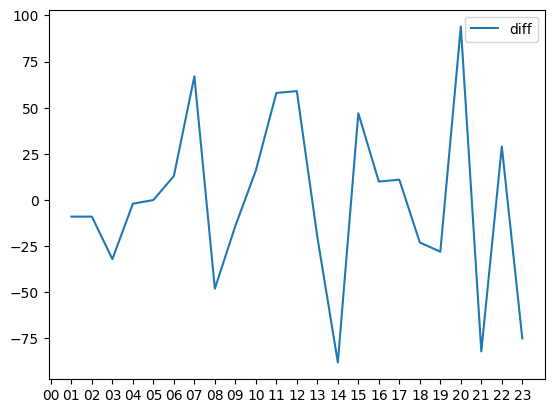

In [310]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [311]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)